<a href="https://colab.research.google.com/github/Yathang007/Neural-Network-Implementation-from-Scratch/blob/main/MDM_DL_Asg1_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression using Sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Wine dataset
digits = datasets.load_digits()
X = digits.data  # Features
y = (digits.target == 0).astype(int)  # Binary classification (Class 1 vs. Not Class 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and prediction
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluation
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
report_sklearn = classification_report(y_test, y_pred_sklearn)

print("Sklearn Model Results on digits Dataset:")
print(f"Accuracy: {accuracy_sklearn:.2f}")
print("Confusion Matrix:")
print(conf_matrix_sklearn)
print("Classification Report:")
print(report_sklearn)


Sklearn Model Results on digits Dataset:
Accuracy: 1.00
Confusion Matrix:
[[327   0]
 [  1  32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      0.97      0.98        33

    accuracy                           1.00       360
   macro avg       1.00      0.98      0.99       360
weighted avg       1.00      1.00      1.00       360



## Logistic Regression using Keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Wine dataset
digits = datasets.load_digits()
X = digits.data  # Features
y = (digits.target == 0).astype(int)  # Binary classification (Class 1 vs. Not Class 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Keras Model
keras_model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])
keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
keras_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
y_pred_keras = (keras_model.predict(X_test) > 0.5).astype(int)

# Evaluation
accuracy_keras = accuracy_score(y_test, y_pred_keras)
conf_matrix_keras = confusion_matrix(y_test, y_pred_keras)
report_keras = classification_report(y_test, y_pred_keras)

print("Keras Model Results on Digits Dataset:")
print(f"Accuracy: {accuracy_keras:.2f}")
print("Confusion Matrix:")
print(conf_matrix_keras)
print("Classification Report:")
print(report_keras)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Keras Model Results on Digits Dataset:
Accuracy: 1.00
Confusion Matrix:
[[327   0]
 [  1  32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      0.97      0.98        33

    accuracy                           1.00       360
   macro avg       1.00      0.98      0.99       360
weighted avg       1.00      1.00      1.00       360



## Logistic Regression from Scratch

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    for _ in range(epochs):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
    return weights

# Predict function
def predict(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)

# Load the Wine dataset
digits = datasets.load_digits()
X = digits.data  # Features
y = (digits.target == 0).astype(int).reshape(-1, 1)  # Binary classification (Class 1 vs. Others)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term (bias)
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize weights
weights = np.zeros((X_train.shape[1], 1))

# Train the model
weights = gradient_descent(X_train, y_train, weights, learning_rate=0.1, epochs=1000)

# Prediction
y_pred = predict(X_test, weights)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression (Scratch) Model Results on digits Dataset:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)



Logistic Regression (Scratch) Model Results on digits Dataset:
Accuracy: 1.00
Confusion Matrix:
[[327   0]
 [  1  32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      0.97      0.98        33

    accuracy                           1.00       360
   macro avg       1.00      0.98      0.99       360
weighted avg       1.00      1.00      1.00       360



# **Activation Functions**

## Sigmoid

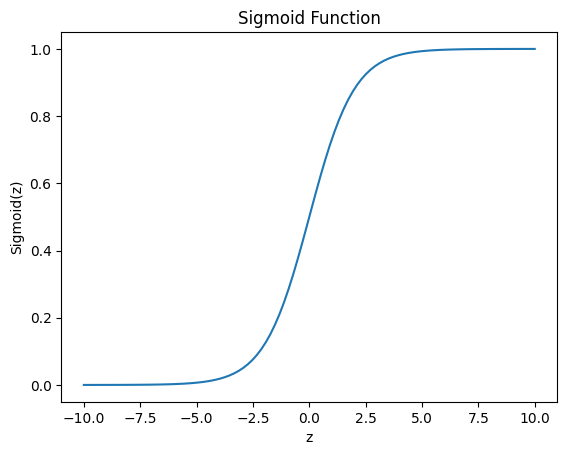

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate a range of values for z
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Plot the sigmoid function
plt.plot(z, sigmoid_values)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function")
plt.show()

## Tanh

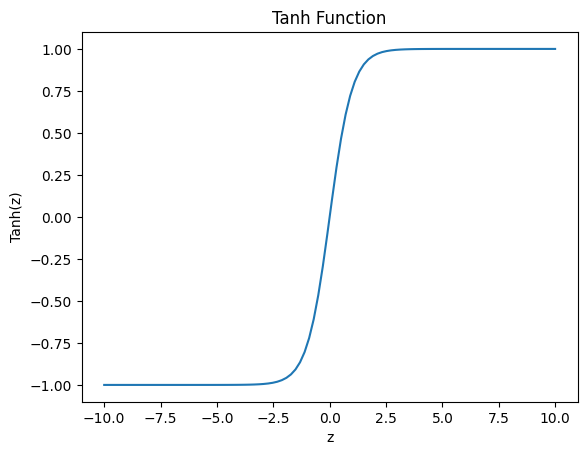

In [ ]:
# TanH function
def tanh(z):
    num = np.exp(z) - np.exp(-z)
    den = np.exp(z) + np.exp(-z)
    return num / den


# Generate a range of values for z
z = np.linspace(-10, 10, 100)
tanh_values = tanh(z)

# Plot the sigmoid function
plt.plot(z, tanh_values)
plt.xlabel("z")
plt.ylabel("Tanh(z)")
plt.title("Tanh Function")
plt.show()

## ReLU

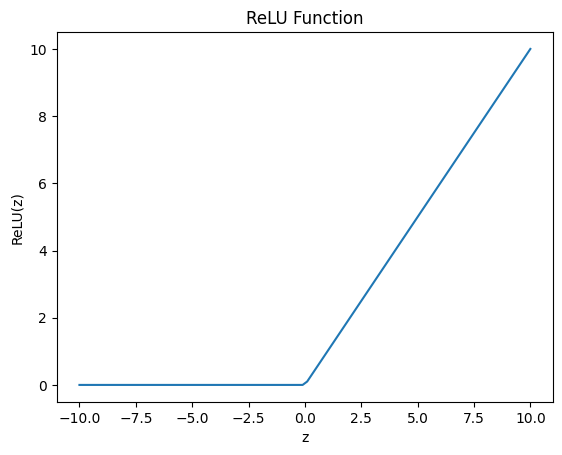

In [ ]:
# ReLU function
def relu(z):
    return np.maximum(0, z)

# Generate a range of values for z
z = np.linspace(-10, 10, 100)           # -10 to +10 spaced with 100 points linearly
relu_values = relu(z)

# Plot the sigmoid function
plt.plot(z, relu_values)
plt.xlabel("z")
plt.ylabel("ReLU(z)")
plt.title("ReLU Function")
plt.show()

## Logloss for a vector

In [ ]:
import numpy as np

def log_loss(y_true, y_pred):
    epsilon = 1e-15                                     # To avoid log(0) error
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Example 1: Good predictions (Low log loss)
y_true_1 = np.array([1, 0, 1, 1, 0])
y_pred_1 = np.array([0.9, 0.1, 0.8, 0.7, 0.2])

# Example 2: Bad predictions (High log loss)
y_true_2 = np.array([1, 0, 1, 1, 0])
y_pred_2 = np.array([0.1, 0.9, 0.2, 0.3, 0.8])  # Opposite of correct labels

print("Log Loss (Example 1 - Low):", log_loss(y_true_1, y_pred_1))
print("Log Loss (Example 2 - High):", log_loss(y_true_2, y_pred_2))

Log Loss (Example 1 - Low): 0.20273661557656092
Log Loss (Example 2 - High): 1.8056037630364457


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-Entropy Loss for Binary Classification
def compute_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient Descent for Logistic Regression (for binary classification)
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]  # Number of training examples
    for epoch in range(epochs):
        # Compute predictions (sigmoid function for binary classification)
        z = np.dot(X, weights)
        predictions = sigmoid(z)

        # Compute gradients
        gradient = np.dot(X.T, (predictions - y)) / m

        # Update weights
        weights -= learning_rate * gradient

        # Compute and print loss every 100 epochs
        if epoch % 100 == 0:
            loss = compute_cross_entropy_loss(y, predictions)
            print(f"Epoch {epoch}, Cross-Entropy Loss: {loss:.4f}")

    return weights

# One-vs-All Training
def train_one_vs_all(X, y, num_classes, learning_rate, epochs):
    weights_all = []
    for class_label in range(num_classes):
        # Create binary labels for the current class
        y_binary = (y == class_label).astype(int)

        # Initialize weights
        weights = np.zeros(X.shape[1])

        # Train the model
        weights = gradient_descent(X, y_binary, weights, learning_rate, epochs)
        weights_all.append(weights)

    return np.array(weights_all).T  # Shape: (num_features, num_classes)

# One-vs-All Prediction
def predict_one_vs_all(X, weights_all):
    z = np.dot(X, weights_all)  # Shape: (num_samples, num_classes)
    probabilities = sigmoid(z)  # Apply sigmoid to get probabilities
    return np.argmax(probabilities, axis=1)  # Predict the class with the highest probability

# Load the digits dataset
digits = load_digits()
X = digits.data  # Features (64-dimensional)
y = digits.target  # Labels (0-9)

# Normalize the features (optional but recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add an intercept term (bias) to the features
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters
learning_rate = 0.1
epochs = 1000
num_classes = 10  # Digits 0-9

# Train the model using one-vs-all
weights_all = train_one_vs_all(X_train, y_train, num_classes, learning_rate, epochs)

# Make predictions on the test set
y_test_pred = predict_one_vs_all(X_test, weights_all)

# Compute test accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

Epoch 0, Cross-Entropy Loss: 0.6931
Epoch 100, Cross-Entropy Loss: 0.1308
Epoch 200, Cross-Entropy Loss: 0.0781
Epoch 300, Cross-Entropy Loss: 0.0580
Epoch 400, Cross-Entropy Loss: 0.0471
Epoch 500, Cross-Entropy Loss: 0.0403
Epoch 600, Cross-Entropy Loss: 0.0355
Epoch 700, Cross-Entropy Loss: 0.0319
Epoch 800, Cross-Entropy Loss: 0.0291
Epoch 900, Cross-Entropy Loss: 0.0269
Epoch 0, Cross-Entropy Loss: 0.6931
Epoch 100, Cross-Entropy Loss: 0.1826
Epoch 200, Cross-Entropy Loss: 0.1278
Epoch 300, Cross-Entropy Loss: 0.1054
Epoch 400, Cross-Entropy Loss: 0.0926
Epoch 500, Cross-Entropy Loss: 0.0842
Epoch 600, Cross-Entropy Loss: 0.0780
Epoch 700, Cross-Entropy Loss: 0.0733
Epoch 800, Cross-Entropy Loss: 0.0696
Epoch 900, Cross-Entropy Loss: 0.0665
Epoch 0, Cross-Entropy Loss: 0.6931
Epoch 100, Cross-Entropy Loss: 0.1461
Epoch 200, Cross-Entropy Loss: 0.0902
Epoch 300, Cross-Entropy Loss: 0.0682
Epoch 400, Cross-Entropy Loss: 0.0560
Epoch 500, Cross-Entropy Loss: 0.0481
Epoch 600, Cross-E

#LogLoss vs Multi Class Cross Entropy

### LogLoss
- Used for binary classification (2 classes)
- Output is Predicted probabilty for the positive class (class 1)
- Used for applications having binary outcomes like Spam detector, Binary image classification etc.
- Formula: 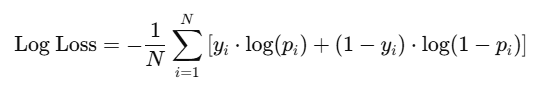

## Cross-Entropy (Multi-Class)
- Used for multi-class classification (more than two classes)
- Output is predicted probabilirt for each class (all summing to 1)
- Used for applications like Digit Classification, Character Classification and Object Detection
- Formula : 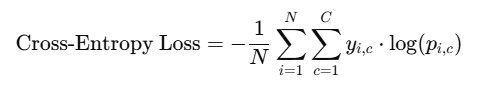